In [1]:
import pandas as pd #dataframe
import numpy as np #dataframe
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import seaborn as sns


In [5]:
data_original = pd.read_csv('site_data_zap.csv',sep='\t')
print(data_original.shape)
data = data_original.drop_duplicates()
data = data.drop(columns=['link'])
data = data.fillna(0)
data.insert(3,'total',data['rent'] + data['condominium'] + data['iptu'])
print(data.shape)
df = data.loc[(data['area'] >= 5) & (data['area'] <= 250)]
print(df.shape)
df = df.loc[(data['room'] >= 1) & (data['bathroom'] >= 1) & (data['car_space'] <= 5)]
print(df.shape)
df = df.loc[(data['total'] <= 3000)]
print(df.shape)

(11306, 10)
(6029, 10)
(4626, 10)
(2963, 10)
(2070, 10)


<AxesSubplot:xlabel='area', ylabel='total'>

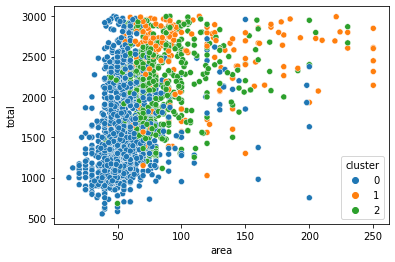

In [8]:
clustering = KMeans(n_clusters=3)
y_predicted = clustering.fit_predict(df[['bathroom','car_space','room']])

# df.insert(6,'cluster',y_predicted)

df['cluster'] = y_predicted
# sns.boxplot(x='cluster', y='total', data=df,palette='tab10')
# sns.boxplot(x='cluster', y='area', data=df,palette='tab10')
# sns.scatterplot(x='room', y='bathroom', data=df, hue='cluster',palette='tab10')
# sns.scatterplot(x='room', y='car_space', data=df, hue='cluster',palette='tab10')
# sns.scatterplot(x='area', y='total', data=df.loc[df['cluster']==0], hue='cluster',palette='tab10')
# sns.scatterplot(x='area', y='total', data=df.loc[df['cluster']==1], hue='cluster',palette='tab10')
sns.scatterplot(x='area', y='total', data=df, hue='cluster',palette='tab10')

<AxesSubplot:xlabel='area', ylabel='total'>

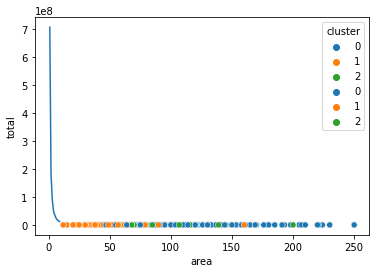

In [7]:
k_range = range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['total','area','bathroom','car_space','room']])
    sse.append(km.inertia_)
plt.plot(k_range,sse)

spectral = sklearn.cluster.Birch(
    n_clusters=3)
y_spectral = spectral.fit_predict(df[['bathroom','car_space','room']])
df['cluster'] = y_spectral
sns.scatterplot(x='area', y='total', data=df, hue='cluster',palette='tab10')

spectral = sklearn.cluster.AgglomerativeClustering(
    n_clusters=3)
y_spectral = spectral.fit_predict(df[['bathroom','car_space','room','total','area']])
df['cluster'] = y_spectral
sns.scatterplot(x='area', y='total', data=df, hue='cluster',palette='tab10')